# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location `~/scikit_learn_data/...`
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

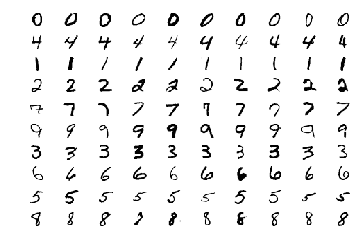

In [3]:
def P1(num_examples=10):
    # Find first 10 labels and data for each digit
    data_indexes = {}
    for index, num in enumerate(mini_train_labels):
        # Skip once num_examples has been added
        if len(data_indexes.get(num, [])) >= num_examples:
            continue

        if data_indexes.get(num) is None:
            data_indexes[num] = [index]
        else:
            data_indexes[num].append(index)

    # Merge indexes from dict into a single array
    flattened_data_indexes = []
    for l in data_indexes.values():
        flattened_data_indexes += l
            
    # Plot 10x10 grid of 10 examples of each digit
    count = 0
    for i in flattened_data_indexes:
        image = np.array(mini_train_data[i]).reshape((28, 28))
        plt.subplot(num_examples, num_examples, count+1)
        plt.axis('off')
        plt.imshow(image, cmap='Greys')
        count += 1


P1()

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):
    # Report accuracy for each k value
    for k in k_values:
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(mini_train_data, mini_train_labels)
        print("K=%s accuracy: %s" % (k, str(knn_model.score(dev_data, dev_labels))))
        
        # K=1 Show precision, recall, and F1 for each label
        if k == 1:
            print(classification_report(dev_labels, knn_model.predict(dev_data)))
        
    
    
k_values = [1, 3, 5, 7, 9]
P2(k_values)

K=1 accuracy: 0.884
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

K=3 accuracy: 0.876
K=5 accuracy: 0.882
K=7 accuracy: 0.877
K=9 accuracy: 0.875


ANSWER: Most difficult digit = 9

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):
    for ts in train_sizes:
        # Fit new model per training size
        knn_model = KNeighborsClassifier(n_neighbors=1)
        knn_model.fit(train_data[:ts], train_labels[:ts])

        # Measure time needed for prediction
        curr_time = time.time()
        score = knn_model.score(dev_data, dev_labels)
        elapsed_time = time.time() - curr_time
        accuracies.append(score)
        
        print("TS=%s, Accuracy: %s, Elapsed Time: %ss" % (ts, str(score), elapsed_time))

    
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

TS=100, Accuracy: 0.702, Elapsed Time: 0.3168954849243164s
TS=200, Accuracy: 0.791, Elapsed Time: 0.666996955871582s
TS=400, Accuracy: 0.811, Elapsed Time: 1.3701610565185547s
TS=800, Accuracy: 0.866, Elapsed Time: 2.454406261444092s
TS=1600, Accuracy: 0.905, Elapsed Time: 4.525661468505859s
TS=3200, Accuracy: 0.927, Elapsed Time: 9.015787839889526s
TS=6400, Accuracy: 0.939, Elapsed Time: 18.044195652008057s
TS=12800, Accuracy: 0.952, Elapsed Time: 36.96553063392639s
TS=25000, Accuracy: 0.962, Elapsed Time: 70.80764675140381s


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [6]:
def P4():
    # Reformat train_size array to matrix
    train_size_matrix = []
    for ts in train_sizes:
        train_size_matrix.append([ts])
        
    # Fit linear regression model and predict for 60000 train size
    lr_model = LinearRegression()
    lr_model.fit(np.array(train_size_matrix), np.array(accuracies))
    prediction = lr_model.predict([[60000]])[0]
    print("Predicted accuracy: %s" % str(prediction))
    
    
P4()

Predicted accuracy: 1.2446923405015078


ANSWER: Regression assumes a linear relationship between our independent and dependent variable, but there is an exponential distribution.  This can be remedied with a logarithmic transformation.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


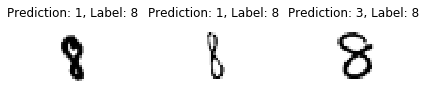

In [7]:
def P5():
    # Output confusion matrix on the dev data
    knn_model = KNeighborsClassifier(n_neighbors=1)
    knn_model.fit(mini_train_data, mini_train_labels)
    predictions = knn_model.predict(dev_data)
    print(confusion_matrix(dev_labels, predictions))
    
    # Find "a few" misclassified digits for "most confused" digit: 8
    count = 0
    mistaken_values = []
    most_confused_digit = '8'
    for index, value in enumerate(dev_labels):
        if predictions[index] != value and count < 3 and value == most_confused_digit:
            mistaken_values.append({'dev_data_index': index, 'predicted_value': predictions[index], 'label_value': value})
            count += 1
            
    # Plot misclassified digits
    plot_count = 0
    for mistaken_value in mistaken_values:
        image = np.array(dev_data[mistaken_value['dev_data_index']]).reshape((28, 28))
        plt.subplot(3, 3, plot_count+1)
        plt.axis('off')
        plt.title("Prediction: %s, Label: %s" % (mistaken_value['predicted_value'], 
                                                 mistaken_value['label_value']))
        plt.imshow(image, cmap='Greys')
        plot_count += 1
    plt.tight_layout()
    
    
P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [8]:
# Simple custom function to apply gaussian blur to our data sets
def simple_custom_gaussian_blur(data_set):
    size = 28
    current_pixel_weight = 2
    outer_pixel_weight = 1
    gaussian_blur_data_set = np.zeros(data_set.shape)
    
    for index, data in enumerate(data_set):
        reformat_data = np.array(data).reshape((size, size))
        # Iterate over all pixels surrounded by 8 other pixels
        for x in range(1,size-1):
            for y in range(1,size-1):
                # Sum outer pixels * outer pixel weight
                curr_sum = 0
                for outer_x in range(x-1, x+1):
                    for outer_y in range(y-1, y+1):
                        if outer_x == x and outer_y == y: continue 
                        curr_sum += reformat_data[outer_x, outer_y] * outer_pixel_weight

                # Add current pixel * curr pixel weight
                curr_sum += reformat_data[x,y] * current_pixel_weight

                # Divide and add new pixel value to dataset
                reformat_data[x,y] = curr_sum / 9
        gaussian_blur_data_set[index] = reformat_data.reshape((1, 784))    
    return gaussian_blur_data_set


def P6():
    from scipy.ndimage.filters import gaussian_filter

    # Preprocess training, not dev data
    pp_using_lib_mini_train_data = gaussian_filter(mini_train_data, sigma=1)
    preproc_mini_train_data = simple_custom_gaussian_blur(mini_train_data)
    
    # Preprocess dev, not training data
    pp_using_lib_dev_data = gaussian_filter(dev_data, sigma=1)
    preproc_dev_data = simple_custom_gaussian_blur(dev_data)
    
    knn_model = KNeighborsClassifier(n_neighbors=1)

    # Results for preprocess training, not dev data using library
    knn_model.fit(pp_using_lib_mini_train_data, mini_train_labels)
    predictions = knn_model.predict(dev_data)
    avg_f1_score = classification_report(dev_labels, predictions, output_dict=True)['weighted avg']['f1-score']
    print("Preprocess train, not dev - Scipy Library Accuracy: %s" % str(avg_f1_score))
    
    # Results for preprocess dev, not training data using library
    knn_model.fit(mini_train_data, mini_train_labels)
    predictions = knn_model.predict(pp_using_lib_dev_data)
    avg_f1_score = classification_report(dev_labels, predictions, output_dict=True)['weighted avg']['f1-score']
    print("Preprocess dev, not train - Scipy Library Accuracy: %s" % str(avg_f1_score))
    
    # Results for preprocess both using library
    knn_model.fit(pp_using_lib_mini_train_data, mini_train_labels)
    predictions = knn_model.predict(pp_using_lib_dev_data)
    avg_f1_score = classification_report(dev_labels, predictions, output_dict=True)['weighted avg']['f1-score']
    print("Preprocess both - Scipy Library Accuracy: %s" % str(avg_f1_score))
    
    # Results for preprocess training, not dev data using custom filter
    knn_model.fit(preproc_mini_train_data, mini_train_labels)
    predictions = knn_model.predict(dev_data)
    avg_f1_score = classification_report(dev_labels, predictions, output_dict=True)['weighted avg']['f1-score']
    print("Preprocess train, not dev - Custom Gaus Blur Accuracy: %s" % str(avg_f1_score))
    
    # Results for preprocess dev, not training data using custom filter
    knn_model.fit(mini_train_data, mini_train_labels)
    predictions = knn_model.predict(dev_data)
    avg_f1_score = classification_report(dev_labels, predictions, output_dict=True)['weighted avg']['f1-score']
    print("Preprocess dev, not train - Custom Gaus Blur Accuracy: %s" % str(avg_f1_score))
    
    # Results for preprocess both using custom filter
    knn_model.fit(preproc_mini_train_data, mini_train_labels)
    predictions = knn_model.predict(preproc_dev_data)
    avg_f1_score = classification_report(dev_labels, predictions, output_dict=True)['weighted avg']['f1-score']
    print("Preprocess both - Custom Gaus Blur Accuracy: %s" % str(avg_f1_score))
    
    
P6()

Preprocess train, not dev - Scipy Library Accuracy: 0.7669343392956228
Preprocess dev, not train - Scipy Library Accuracy: 0.5342448683224085
Preprocess both - Scipy Library Accuracy: 0.4642035814479944
Preprocess train, not dev - Custom Gaus Blur Accuracy: 0.8236218315325178
Preprocess dev, not train - Custom Gaus Blur Accuracy: 0.8832988391528966
Preprocess both - Custom Gaus Blur Accuracy: 0.8904742215759743


ANSWER:  Overall, the simple custom gaussian blur described above performs much better than the scip version.  The best results came from using the custom blur on both the dev and train data sets.  This is a result of smoothing to help us avoid overfitting, so the accuracy on the dev set was better.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [9]:
def P7():
    # Binarize the data
    b_mini_train_data = np.zeros(mini_train_data.shape)
    b_dev_data = np.zeros(dev_data.shape)
    for feature in range(mini_train_data.shape[1]):
        b_mini_train_data[:,feature] = mini_train_data[:,feature] > 0.50
        b_dev_data[:,feature] = dev_data[:,feature] > 0.50
    
    # BernoulliNB
    bnb_model = BernoulliNB()
    bnb_model.fit(b_mini_train_data, mini_train_labels)
    bnb_score = bnb_model.score(b_dev_data, dev_labels)
    print("BernoulliNB Accuracy: %s" % str(bnb_score))
    
    # Black, grey, white the data
    bgw_mini_train_data = np.zeros(mini_train_data.shape)
    bgw_dev_data = np.zeros(dev_data.shape)
    for feature in range(mini_train_data.shape[1]):
        new_feature_array = []
        for value in mini_train_data[:,feature]:
            if value >= 0.33 and value <= 0.67:
                new_feature_array.append(1)
            elif value < 0.33:
                new_feature_array.append(0)
            else:
                new_feature_array.append(2)
        bgw_mini_train_data[:,feature] = new_feature_array

        new_feature_array = []
        for value in dev_data[:,feature]:
            if value >= 0.33 and value <= 0.67:
                new_feature_array.append(1)
            elif value < 0.33:
                new_feature_array.append(0)
            else:
                new_feature_array.append(2)
        bgw_dev_data[:,feature] = new_feature_array
    
    # MultinomialNB
    mnb_model = MultinomialNB()
    mnb_model.fit(bgw_mini_train_data, mini_train_labels)
    mnb_score = mnb_model.score(bgw_dev_data, dev_labels)
    print("MultinomialNB Accuracy: %s" % str(mnb_score))
    
P7()

BernoulliNB Accuracy: 0.819
MultinomialNB Accuracy: 0.815


ANSWER:  The multiclass version does not improve the results; In fact, the results slightly decrease.  This is a result of the nature of the problem since a writing mark (e.g. black or 1) is what is being used in the Naive Bayes algorithm, not the severity or degree.  As such, both algorithms performed fairly similarly, but adding the additional classes to the multinomial model lowered its overall accuracy.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [10]:
def P8(alphas):  
    # Binarize the data
    b_mini_train_data = np.zeros(mini_train_data.shape)
    for feature in range(mini_train_data.shape[1]):
        b_mini_train_data[:,feature] = mini_train_data[:,feature] > 0.50

    # GridSearch over alpha values
    bnb_model = BernoulliNB()
    gscv = GridSearchCV(bnb_model, alphas, cv=5)
    gscv.fit(b_mini_train_data, mini_train_labels)
    return gscv

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

c:\software\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\software\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\software\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\software\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\software\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\software\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The d

In [11]:
print("Alpha=0 Accuracy: %s" % str(nb.cv_results_['mean_test_score'][0]))
print(nb.best_params_)

Alpha=0 Accuracy: 0.83
{'alpha': 0.001}


ANSWER:  
Best value for Alpha: 0.001
Alpha=0 Accuracy: 0.83  
Expected?  Yes.  Laplace smoothing is added to avoid overfitting at the cost of some overall accuracy, so an extremely low amount of smoothing should have the highest accuracy.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [12]:
def P9():
    gnb_model = GaussianNB()
    gnb_model.fit(mini_train_data, mini_train_labels)
    print("Initial GaussianNB Accuracy: %s" % str(gnb_model.score(dev_data, dev_labels)))
    print(gnb_model.get_params(True))
    
    gnb_model = GaussianNB(var_smoothing=0.06)
    gnb_model.fit(mini_train_data, mini_train_labels)
    print("Adjusted GaussianNB Accuracy: %s" % str(gnb_model.score(dev_data, dev_labels)))
    print(gnb_model.get_params(True))
    

gnb = P9()

Initial GaussianNB Accuracy: 0.593
{'priors': None, 'var_smoothing': 1e-09}
Adjusted GaussianNB Accuracy: 0.821
{'priors': None, 'var_smoothing': 0.06}


ANSWER:  I used the var_smoothing parameter to drastically improve the accuracy of the GaussianNB model.  This was achieved because the smoothing value was neglible (1e-09), so hardly any smoothing was occurring likely resulting in overfitting.  As such, assessing the model against the dev data set yielded poor results.  My solution was to increase the smoothing value until similar results to the BernoulliNB model were reached.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

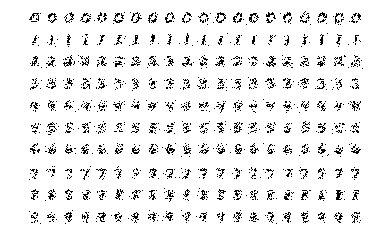

In [13]:
def P10(num_examples):
    # Binarize the data
    b_mini_train_data = np.zeros(mini_train_data.shape)
    for feature in range(mini_train_data.shape[1]):
        b_mini_train_data[:,feature] = mini_train_data[:,feature] > 0.50

    # Fit BernoulliNB
    bnb_model = BernoulliNB()
    bnb_model.fit(b_mini_train_data, mini_train_labels)
    
    # For each digits probability
    generated_numbers = []
    for prob in bnb_model.feature_log_prob_:
        # Convert from log probability back to probability
        float_probs = np.exp(prob)
        
        # Generate 20 examples of each digit
        for i in range(0, num_examples):
            # New random values each iteration
            random_chances = np.random.rand(784)
            generated_numbers.append(float_probs >= random_chances)
        
    # Plot each newly generated number
    plot_count = 0    
    for number in generated_numbers:
        image = np.array(number).reshape((28, 28))
        plt.subplot(10, num_examples, plot_count+1)
        plt.axis('off')
        plt.imshow(image, cmap='Greys')
        plot_count += 1
        
    
P10(20)

ANSWER:  The newly generated digits look quite sparse, but have a noticable resemblance to the actual digit they represent.  The sparseness is due to the probablistic properties of the Bernoulli distribution for every pixel, so this is expected.  Overall, this exercise is absolutely fantastic and I enjoyed learning this process.  

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [14]:
def P11(buckets, correct, total):
    # Binarize training and dev data
    b_train_data = np.zeros(train_data.shape)
    b_test_data = np.zeros(test_data.shape)
    for feature in range(train_data.shape[1]):
        b_train_data[:,feature] = train_data[:,feature] > 0.50
        b_test_data[:,feature] = test_data[:,feature] > 0.50

    # Fit BernoulliNB - Using alpha 0.5 determined in P8
    bnb_model = BernoulliNB(alpha=0.5)
    bnb_model.fit(b_train_data, train_labels)
    
    for i, data_point in enumerate(b_test_data):
        # Determine posterior probabilities
        label_probability_index = int(test_labels[i])
        bnb_model_confidence = bnb_model.predict_proba([data_point])[0][label_probability_index]

        # Determine appropriate bucket
        bucket_index = 0
        for value in buckets:
            if bnb_model_confidence > value:
                bucket_index += 1
            else:
                continue
        
        # Update correct count for bucket
        if bnb_model.predict([data_point])[0] == test_labels[i]:
            correct[bucket_index] += 1
        
        # Update total count for bucket
        total[bucket_index] += 1

    
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

print(buckets)
print(correct)
print(total)

for i in range(len(buckets)):
   accuracy = 0.0
   if (total[i] > 0): accuracy = correct[i] / total[i]
   print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

[0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
[2, 149, 421, 475, 495, 524, 569, 524, 4429]
[1414, 149, 421, 475, 495, 524, 569, 524, 4429]
p(pred) <= 0.5000000000000    total = 1414    accuracy = 0.001
p(pred) <= 0.9000000000000    total = 149    accuracy = 1.000
p(pred) <= 0.9990000000000    total = 421    accuracy = 1.000
p(pred) <= 0.9999900000000    total = 475    accuracy = 1.000
p(pred) <= 0.9999999000000    total = 495    accuracy = 1.000
p(pred) <= 0.9999999990000    total = 524    accuracy = 1.000
p(pred) <= 0.9999999999900    total = 569    accuracy = 1.000
p(pred) <= 0.9999999999999    total = 524    accuracy = 1.000
p(pred) <= 1.0000000000000    total = 4429    accuracy = 1.000


ANSWER:  The calibration for my BernoulliNB model is excellent.  When finally introducing the trained BernoulliNB model to the test set, it was able to predict with 100% accuracy when it had a confidence level of 90%+.  Many of these exercises for this Project 1 submission really helped me understand the fine details of training one of my first machine learning models.  Thanks professor.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [15]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()